<h1> Chaotic photon orbits and shadows of a non-Kerr <br> object described by the Hartle-Thorne spacetime <h1>

These notebooks accompany the paper
"Chaotic photon orbits and shadows of a non-Kerr object described by the Hartle-Thorne spacetime" ([arXiv:2111.09367 [gr-qc]](https://arxiv.org/abs/2111.09367)) and give a demonstration of the calculations present in the paper. 
The code is in some extent based on programs available as examples in the [SageManifolds project's](https://sagemanifolds.obspm.fr/examples.html) website. 

<h2> Open HT System <h2>

Up to $b\approx 4.30427$ the system has two "throats" connecting the pocket of motion with the compact object and one throat connecting it with spatial infinity. It is in that sense that our system can be characterized as an open Hamiltonian system with three escapes.

In [1]:
%display latex
version()



'SageMath version 9.2, Release Date: 2020-10-24'

In [2]:
import numpy as np
import pandas as pd
from scipy.interpolate import interp1d
import multiprocessing as mp


In [3]:
M = Manifold(4, 'M', latex_name=r'\mathcal{M}', structure='Lorentzian')





X.<t,r,th,ph>=M.chart(r"t r:(2.001,+inf) th:(0,pi):\theta ph:(0,2*pi):periodic\phi")

X.coord_range()

t: (-oo, +oo); r: (2.00100000000000, +oo); th: (0, pi); ph: [0, 2*pi] (periodic)

In [4]:
var('m,b,a,Ω,q', domain='real')
g = M.metric()
m=1


In [5]:
g[0,0] =((2*m)/r - 1) + (1/(16*m^2*r^5))*(a^2)*(((64*m^6)*r)*(sin(th)^2) - (32*m^6)*r -(1 - 3*(cos(th)^2))*(((16*m^5)*(2*m - r))*(m + r) - ((5*r^3)*q)*(((2*m)*(m - r))*(2*m^2 - 3*r^2 + (6*m)*r) + ((3*r^2)*(r - 2*m)^2)*log(1 - (2*m)/r)))) 

g[0,3] = -2*a*(m^2)*((sin(th))^2)/r

##
g[1,1]= 1/(1 - (2*m)/r) - (1/(32*m^2*r^3*(r - 2*m)^2))*(a^2)*((2*m)*(80*m^6 + (8*m^4)*r^2 - (24*m^5)*r + ((10*m^3)*r^3)*q + ((20*m^2)*r^4)*q - ((45*m)*r^5)*q + (15*r^6)*q) + (((15*r^5)*(r - 2*m)^2)*q)*log(1 - (2*m)/r) + (3*cos(2*th))*((2*m)*(80*m^6 + (8*m^4)*r^2 - (56*m^5)*r + ((10*m^3)*r^3)*q + ((20*m^2)*r^4)*q - ((45*m)*r^5)*q + (15*r^6)*q) + (((15*r^5)*(r - 2*m)^2)*q)*log(1 - (2*m)/r))) 



g[2,2] =r^2 + (1/8)*((a^2*r^2)*(3*(cos(th)^2) - 1))*(-(((8*m^3)*(2*m + r))/r^4) - (5*q)*(-((2*m)/r) + (3*r)/m + ((3*r^2)/(2*m^2) - 3)*log(1 - (2*m)/r) + 3))



g[3,3] = (r^2)*(sin(th)^2) + (1/8)*(((a^2*r^2)*(3*(cos(th)^2) - 1))*(-(((8*m^3)*(2*m+ r))/r^4)-(5*q)*(-((2*m)/r) + (3*r)/m + ((3*r^2)/(2*m^2) - 3)*log(1 - (2*m)/r) + 3)))*(sin(th)^2)

g.display()

g = (2/r + 1/16*(64*r*sin(th)^2 - (5*(3*(r - 2)^2*r^2*log(-2/r + 1) + 2*(3*r^2 - 6*r - 2)*(r - 1))*q*r^3 + 16*(r + 1)*(r - 2))*(3*cos(th)^2 - 1) - 32*r)*a^2/r^5 - 1) dt*dt - 2*a*sin(th)^2/r dt*dph + (-1/(2/r - 1) - 1/32*(15*q*(r - 2)^2*r^5*log(-2/r + 1) + 30*q*r^6 - 90*q*r^5 + 40*q*r^4 + 20*q*r^3 + 16*r^2 + 3*(15*q*(r - 2)^2*r^5*log(-2/r + 1) + 30*q*r^6 - 90*q*r^5 + 40*q*r^4 + 20*q*r^3 + 16*r^2 - 112*r + 160)*cos(2*th) - 48*r + 160)*a^2/((r - 2)^2*r^3)) dr*dr + (-1/16*(5*(3*(r^2 - 2)*log(-2/r + 1) + 6*r - 4/r + 6)*q + 16*(r + 2)/r^4)*(3*cos(th)^2 - 1)*a^2*r^2 + r^2) dth*dth - 2*a*sin(th)^2/r dph*dt + (-1/16*(5*(3*(r^2 - 2)*log(-2/r + 1) + 6*r - 4/r + 6)*q + 16*(r + 2)/r^4)*(3*cos(th)^2 - 1)*a^2*r^2*sin(th)^2 + r^2*sin(th)^2) dph*dph

We create $(m,r,\theta,a)$ functions for each of the metric components, for easier manipulation.

In [6]:
def g00(m,r,th,a):return g[0,0](m,r,th,a)
def g03(m,r,th,a):return g[0,3](m,r,th,a)
def g11(m,r,th,a):return g[1,1](m,r,th,a)
def g22(m,r,th,a):return g[2,2](m,r,th,a)
def g33(m,r,th,a):return g[3,3](m,r,th,a)
def D(m,r,th,a): return (g03(m,r,th,a))^2-g00(m,r,th,a)*g33(m,r,th,a)

In [7]:
E.<x,y,z> = EuclideanSpace()
phi = M.diff_map(E, [r*sin(th)*cos(ph), r*sin(th)*sin(ph), r*cos(th)])
phi.display()

M --> E^3
   (t, r, th, ph) |--> (x, y, z) = (r*cos(ph)*sin(th), r*sin(ph)*sin(th), r*cos(th))

<h2> Plot of a photon orbit in the allowed motion region <h2>

We use the null condition $u^\alpha u_\alpha = 0 $ to define the effective potential for photons,
\begin{equation}
    V_{eff}(r,\theta,b)=-\frac{1}{\mathcal{D}}\left(L^2 g_{tt} + 2EL g_{t\phi} + E^2 g_{\phi\phi}\right).
\end{equation}
For $u^r=u^\theta=0$ the roots of $V_{eff}$ form a curve in the meridian plane, which is called the **zero-velocity separatrix** or **curve of zero velocity (CZV)**.

The shape of the allowed motion region (separatrix), depends on the impact parameter $b$, and the free parameters, $a,q$.

In [8]:
b=4.30426204081633
sep(m,r,th,a)= -((1/D(m,r,th,a))*((b^2)*g00(m,r,th,a)+2*b*g03(m,r,th,a)+g33(m,r,th,a)))
czv(a,q)=sep(m,r,th,a)

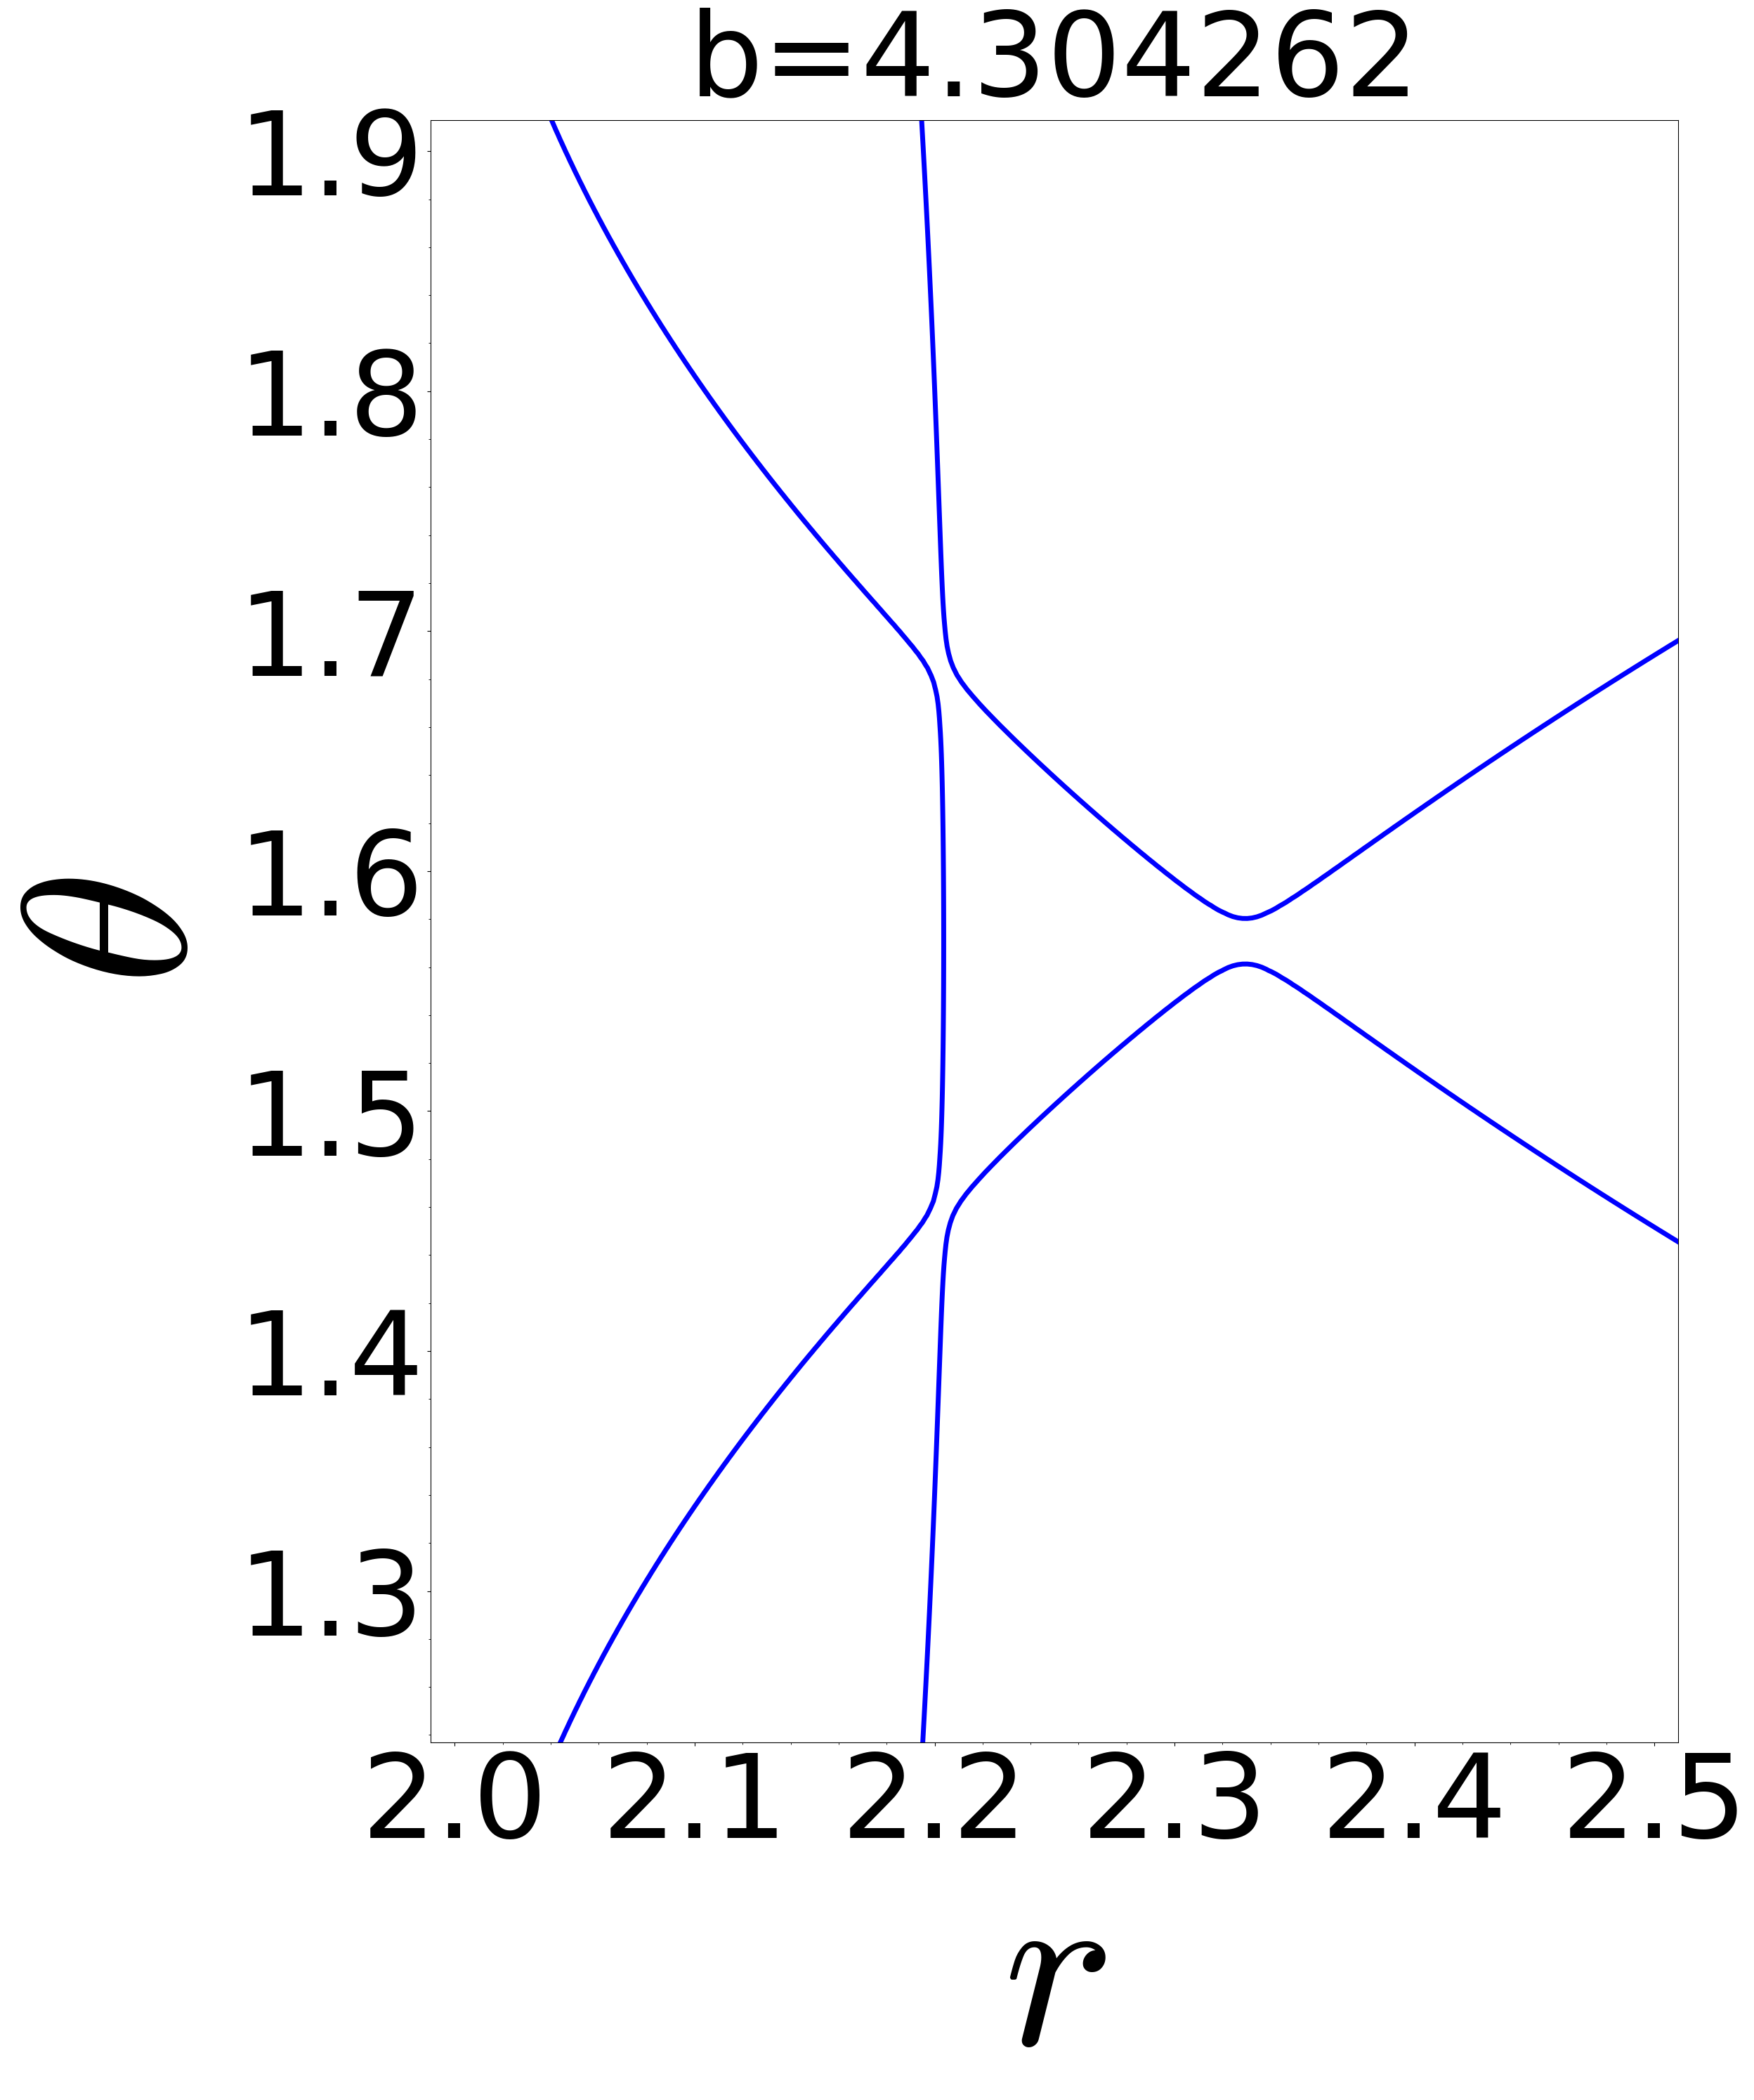

In [9]:
graph_separatrix = implicit_plot(czv(0.327352,1),(r,2,4),(th,0,3),linewidth=5,
                       plot_points=1000,figsize=[30,30],fontsize=120,
                       axes_labels_size=2,
                       frame=True,title='b=%f'%b)
show(graph_separatrix,xmin=2,xmax=2.5,ymin=1.25,ymax=1.9,axes_labels=[r'$r$', r'$ \theta$'])

We use $\mathcal{H}= \frac{1}{2}\left(g_{rr}\dot{r}^2 +g_{\theta\theta}\dot{\theta}^2 - \frac{L^2 g_{tt} + 2EL g_{t\phi} + E^2 g_{\phi\phi}}{\mathcal{D}}\right)=0$ , to define an initial velocity vector. We express the 4-velocity components in terms of the impact parameters $b$ and $a$, for which we use the variables $b$ and $al$ respectively.

In [10]:

def initial(r0, b,al, ph0=0, E=1, inward=False):
    t0,th0=0,pi/2
    L = -b*E
    vth0 = al/(100*r0)
    vt0=(E*g33(m,r0,th0,a)+L*g03(m,r0,th0,a))/(D(m,r0,th0,a))
    vr0=sqrt((((1/D(m,r0,th0,a))*((L^2)*g00(m,r0,th0,a)+2*E*L*g03(m,r0,th0,a)+(E^2)*g33(m,r0,th0,a)))
              -((vth0)^2)*g22(m,r0,th0,a))/g11(m,r0,th0,a))
    if inward:
        
        vr0 = - vr0
    
    vph0 = -(1/D(m,r0,th0,a))*(E*g03(m,r0,th0,a)+L*(g00(m,r0,th0,a)))
    p0 = M((t0, r0, th0, ph0), name='p_0')
    
    return M.tangent_space(p0)((vt0, vr0, vth0, vph0), name='v_0')


In [11]:

th0=pi/2 
s = var('s')  # affine parameter 

In [12]:

v0 = initial(r0=100,b=-4.30426204081633,al=0.022, ph0=0, inward=True)
c1 = M.integrated_geodesic(g, (s, 0, 300), v0, across_charts=True)


sol1 = c1.solve_across_charts(step=0.01, method='odeint', parameters_values={a:0.327352,q:1},
                              verbose='True',solution_key='sol1')

interp = c1.interpolate(solution_key='sol1',
                        interpolation_key='interp', verbose=True)
 

Performing numerical integration with method 'ode'.
Integration will take place on the whole manifold domain.
Integration successful.
Performing cubic spline interpolation by default...
Interpolation completed and associated with the key 'interp' (if this key already referred to a former interpolation, such an interpolation was erased).


In order to plot the geodesic in the $(r,\theta)$ plane, we append the values of the coordinates in a list.

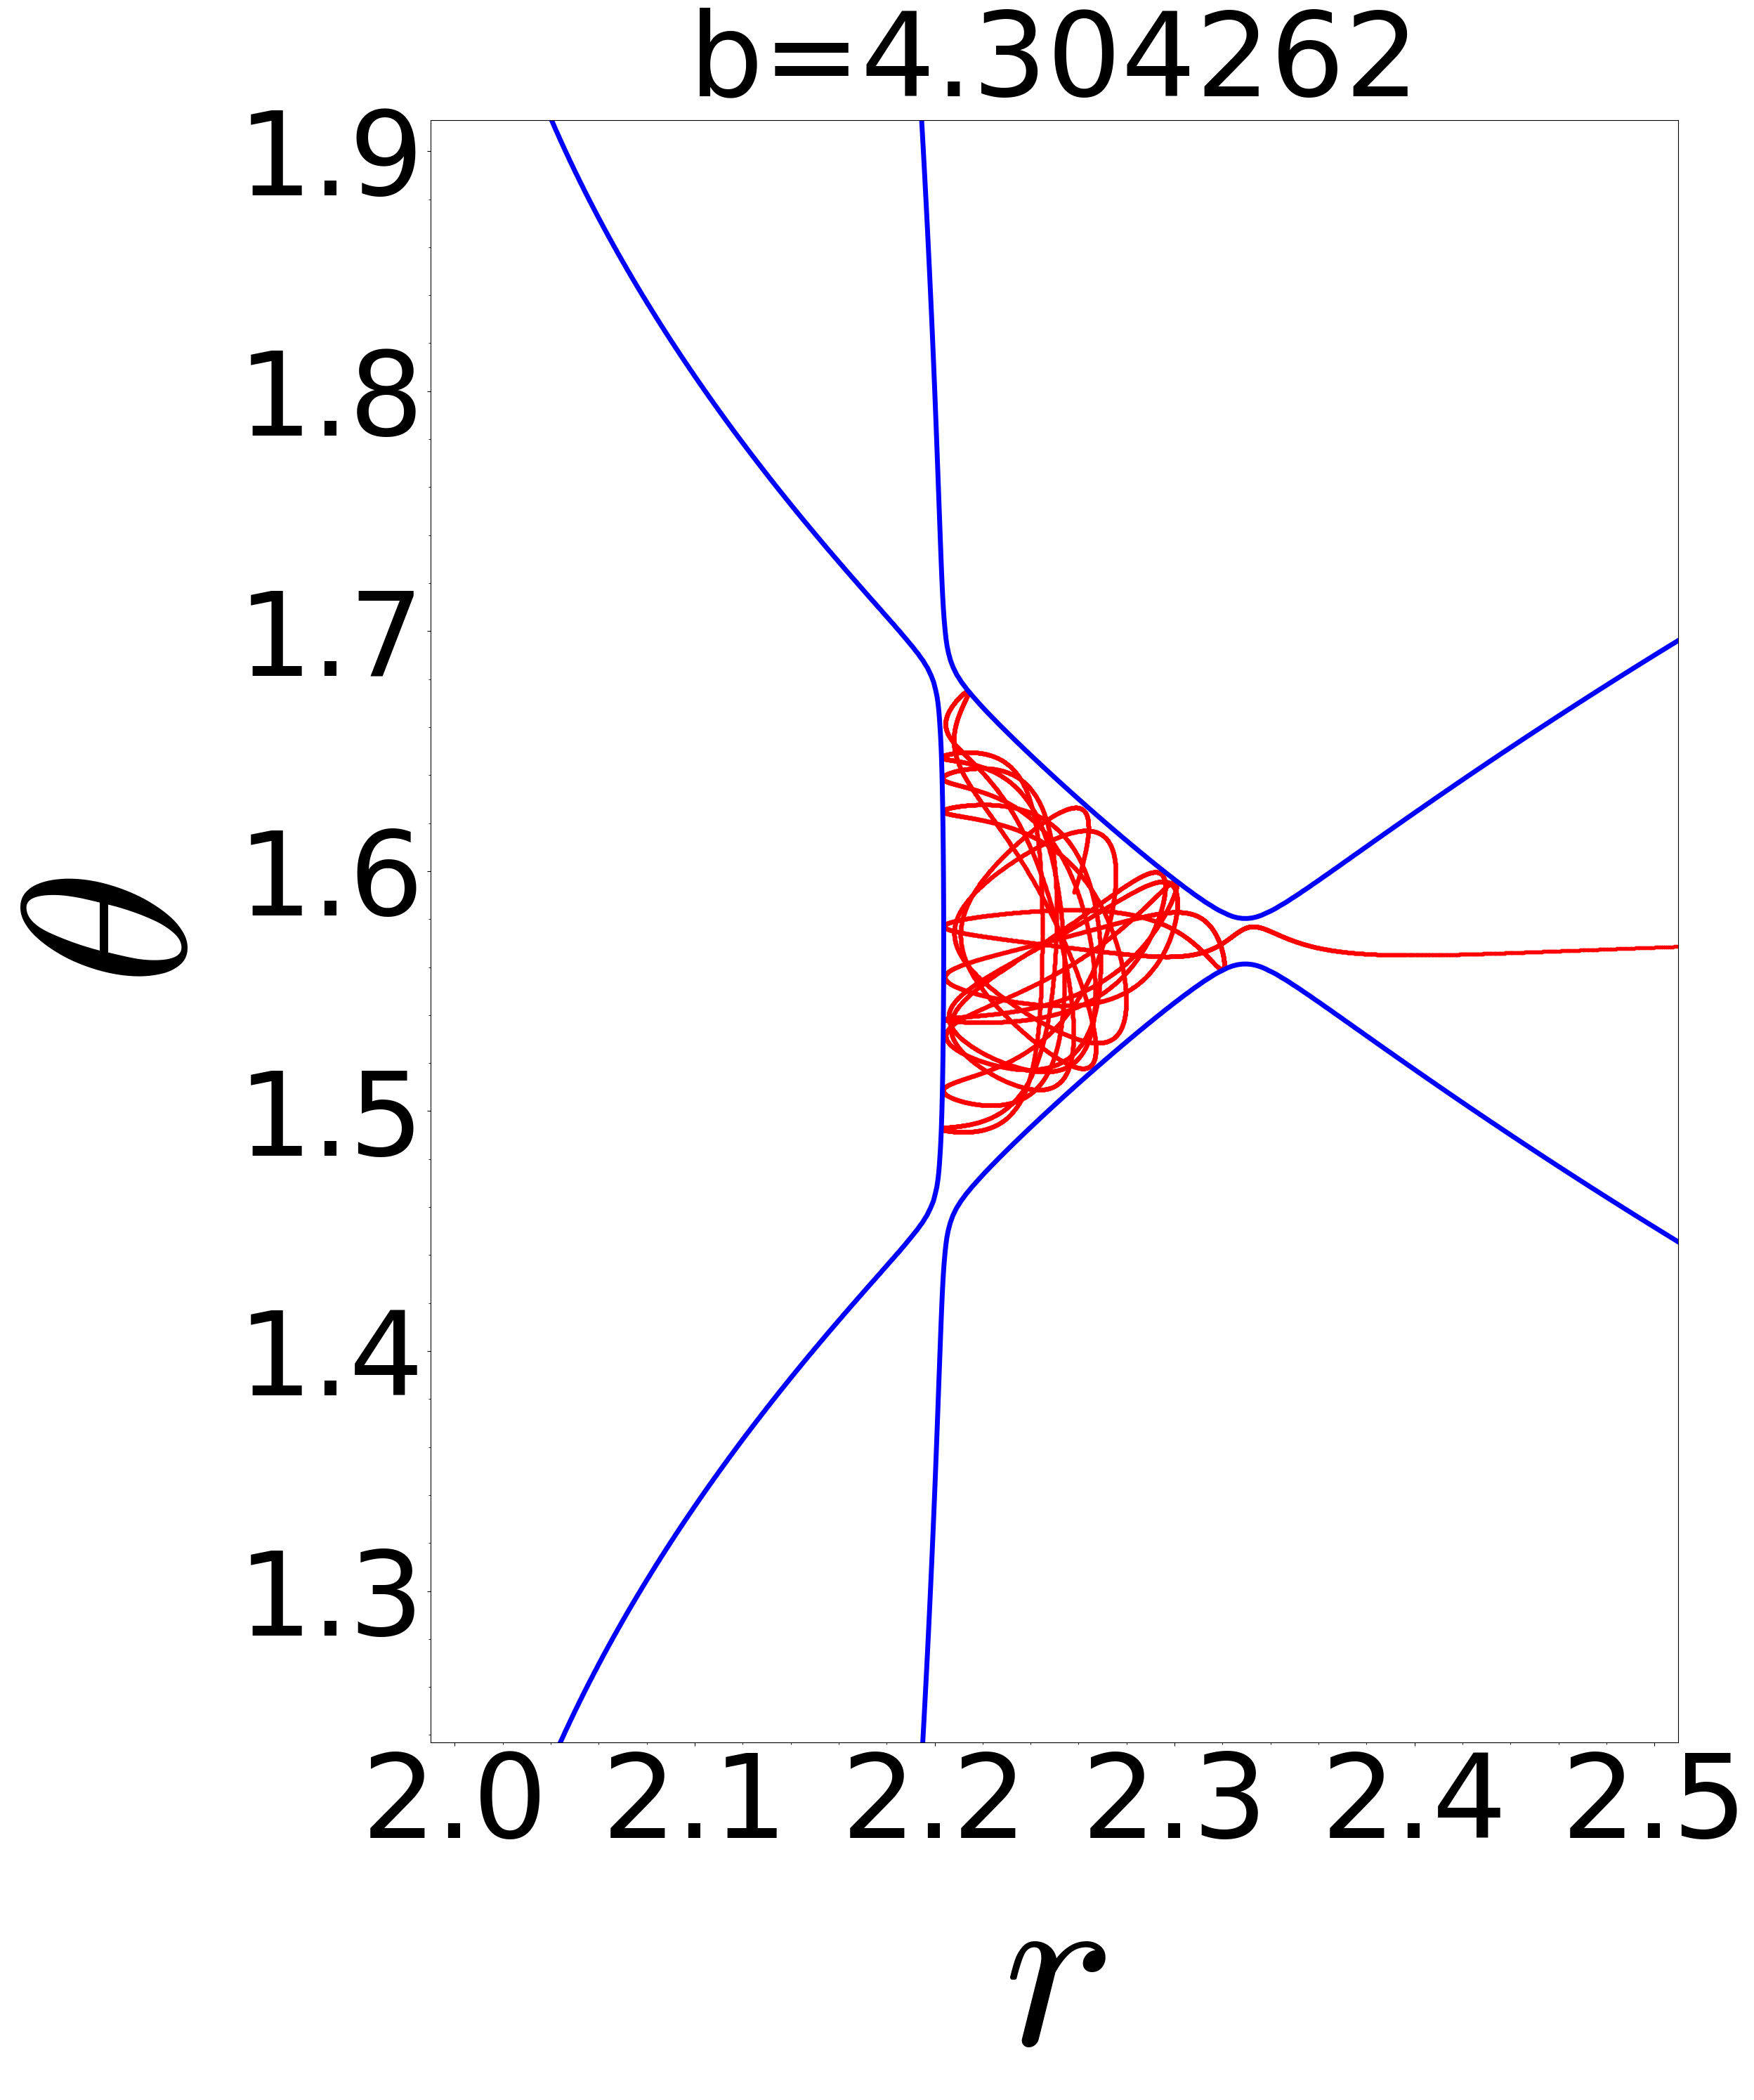

In [13]:
sepa=[]
for i in range(len(sol1[0][1])):
    sepa.append([sol1[0][1][i][2],sol1[0][1][i][3]])
    
graph_orbit=scatter_plot(sepa,aspect_ratio='automatic',figsize=[50,50],alpha=1,markersize=10,zorder=2,edgecolor='red',facecolor='red')
show(graph_orbit+graph_separatrix,xmin=2,xmax=2.5,ymin=1.25,ymax=1.9,axes_labels=[r'$r$', r'$ \theta$'])

<h2> Exit basins of the open HT system <h2>

We restrict the coordinate chart to $2.19M < r < 50M $

In [14]:
X.add_restrictions(2.19<r<50)

We create a new function for the initial 4-velocity, that has $(r,u^r)$ and the impact parameter $b$ as its arguments. 

In [15]:
def initial_rv(r0,v00,b,  ph0=0, E=1, inward=False):
    t0,th0=0,pi/2
    L = -b*E
    vt0=(E*g33(m,r0,th0,a)+L*g03(m,r0,th0,a))/(D(m,r0,th0,a))
    vr0=v00
    if inward:
        vr0 = - vr0
    vth0 = sqrt((((1/D(m,r0,th0,a))*((L^2)*g00(m,r0,th0,a)+2*E*L*g03(m,r0,th0,a)+(E^2)*g33(m,r0,th0,a)))-((v00)^2)*g11(m,r0,th0,a))/g22(m,r0,th0,a))
    vph0 = -(1/D(m,r0,th0,a))*(E*g03(m,r0,th0,a)+L*(g00(m,r0,th0,a)))
    p0 = M((t0, r0, th0, ph0), name='p_0')
    
    return M.tangent_space(p0)((vt0, vr0, vth0, vph0), name='v_0')

An $N\times M$ grid is needed in order to scan the $(r,u^r)$ space.

In [16]:

r0_min = 2.205
r0_max = 2.33
nr0 = 3
dr0 = (r0_max - r0_min) / (nr0 - 1)
r0_sel = [(r0_min + i*dr0) for i in range(nr0)]


In [5]:

v00_min = -0.015
v00_max = 0.015
nv00 = 3
dv00 = (v00_max - v00_min) / (nv00 - 1)
v00_sel = [(v00_min + i*dv00) for i in range(nv00)]

v00_sel+= [0]


We declared a small $N \times M$ grid to check that the code works. A grid of above $200 \times 200$ should be set, in order to get a good qualitative sense of the system. Note that great computational power must be available for the Poincare section to be computed in one go, without the RAM crashing. Since the function takes $r_0$ as an argument, **r
0_sel** can be broken down into smaller intervals, depending on the specifications of the PC used. 

We use the $check$ function to avoid the abrupt interruption of the integration when an initial $(r_0,u^r_0)$ point,
is not in the allowed motion region.

In [18]:
L=4.30426204081633
check(r,v00)=((((1/D(m,r,pi/2,a))*((L^2)*g00(m,r,pi/2,a)+2*L*g03(m,r,pi/2,a)+g33(m,r,pi/2,a)))-((v00)^2)*g11(m,r,pi/2,a))/g22(m,r,pi/2,a)).subs(a=0.327352,q=1)

We define a callable integration function in which we color code the initial conditions as red when the null rays escape to infinity, green when they plunge into the compact object through the upper throat, blue for the lower one and black for those that are trapped. We use $pandas$ to save each batch ran in .csv files to be basic-PC-friendly.

The function is called by the $pool.map()$ method that is implemented in Python's multiprocessing module.


In [19]:

def integration_exb(r0):

    
    

    
    
    
    poin=[]
    for v00 in v00_sel:
        color=0
        
        print(r0)
        if check(r0,v00)>0:
            
            
            
        
            ph0=0
            v0 = initial_rv(r0,v00, b=-4.30426204081633, ph0=ph0, inward=True)
            c1 = M.integrated_geodesic(g, (s, 0, 1000), v0, across_charts=True)


            sol1 = c1.solve_across_charts(step=0.1, method='odeint', parameters_values={a:0.327352,q:1},
                                        verbose='True',solution_key='sol1')


            
      
            interp = c1.interpolate(solution_key='sol1',
                                    interpolation_key='interp', verbose=True)

            c1._interpolations['interp'] = c1._interpolations['interp'][0][1]            
        
            
        

    #infinity#
            if sol1[0][1][len(sol1[0][1])-1][2]>20  :
        
        
                    
                color='red'
    
    #upper throat#   
            if sol1[0][1][len(sol1[0][1])-1][2]<3 and sol1[0][1][len(sol1[0][1])-1][3]>pi/2 and sol1[0][1][len(sol1[0][1])-1][0] < 900:
                color='green'
    
    #lower throat#
                
            if sol1[0][1][len(sol1[0][1])-1][2]<3 and sol1[0][1][len(sol1[0][1])-1][3]<pi/2 and sol1[0][1][len(sol1[0][1])-1][0] < 900:
                color='blue'
                
            if sol1[0][1][len(sol1[0][1])-1][2]<3 and sol1[0][1][len(sol1[0][1])-1][0] > 900:
                
                color='black'
                
                
                

                
            poin.append([color,r0,v00])
        
        
    my_df=pd.DataFrame(poin)
    my_df.to_csv(r'G:\desktop\exit basins test\poin(%f).csv' %r0,index=False,header=False) 

        
        
        
    


In [20]:
pool = mp.Pool(9)
sols = pool.map(integration_exb,[r0 for r0 in r0_sel])

2.33000000000000
2.20500000000000
2.26750000000000
2.33000000000000
Performing numerical integration with method 'ode'.
Integration will take place on the whole manifold domain.
Performing numerical integration with method 'ode'.
Integration will take place on the whole manifold domain.
Performing numerical integration with method 'ode'.
Integration will take place on the whole manifold domain.
Exiting chart, trying to switch to another chart.
No chart found, stopping integration.
Performing cubic spline interpolation by default...
Interpolation completed and associated with the key 'interp' (if this key already referred to a former interpolation, such an interpolation was erased).
2.20500000000000
2.20500000000000
Integration successful.
Performing cubic spline interpolation by default...
Interpolation completed and associated with the key 'interp' (if this key already referred to a former interpolation, such an interpolation was erased).
2.33000000000000
2.33000000000000
Integration 

In [21]:
pool.close() 

A grid of $190 \times 95 $ initial conditions is presented. It was computed on a completely basic i3 Laptop using this code over the course of a day.

We merge the $.csv$ files and draw the exit basins

In [6]:
#for the purpose of pd.read_csv, assuming a larger grid was set.
r0_min = 2.205
r0_max = 2.33
nr0 = 190
dr0 = (r0_max - r0_min) / (nr0 - 1)
r0_sel = [(r0_min + i*dr0) for i in range(nr0)]


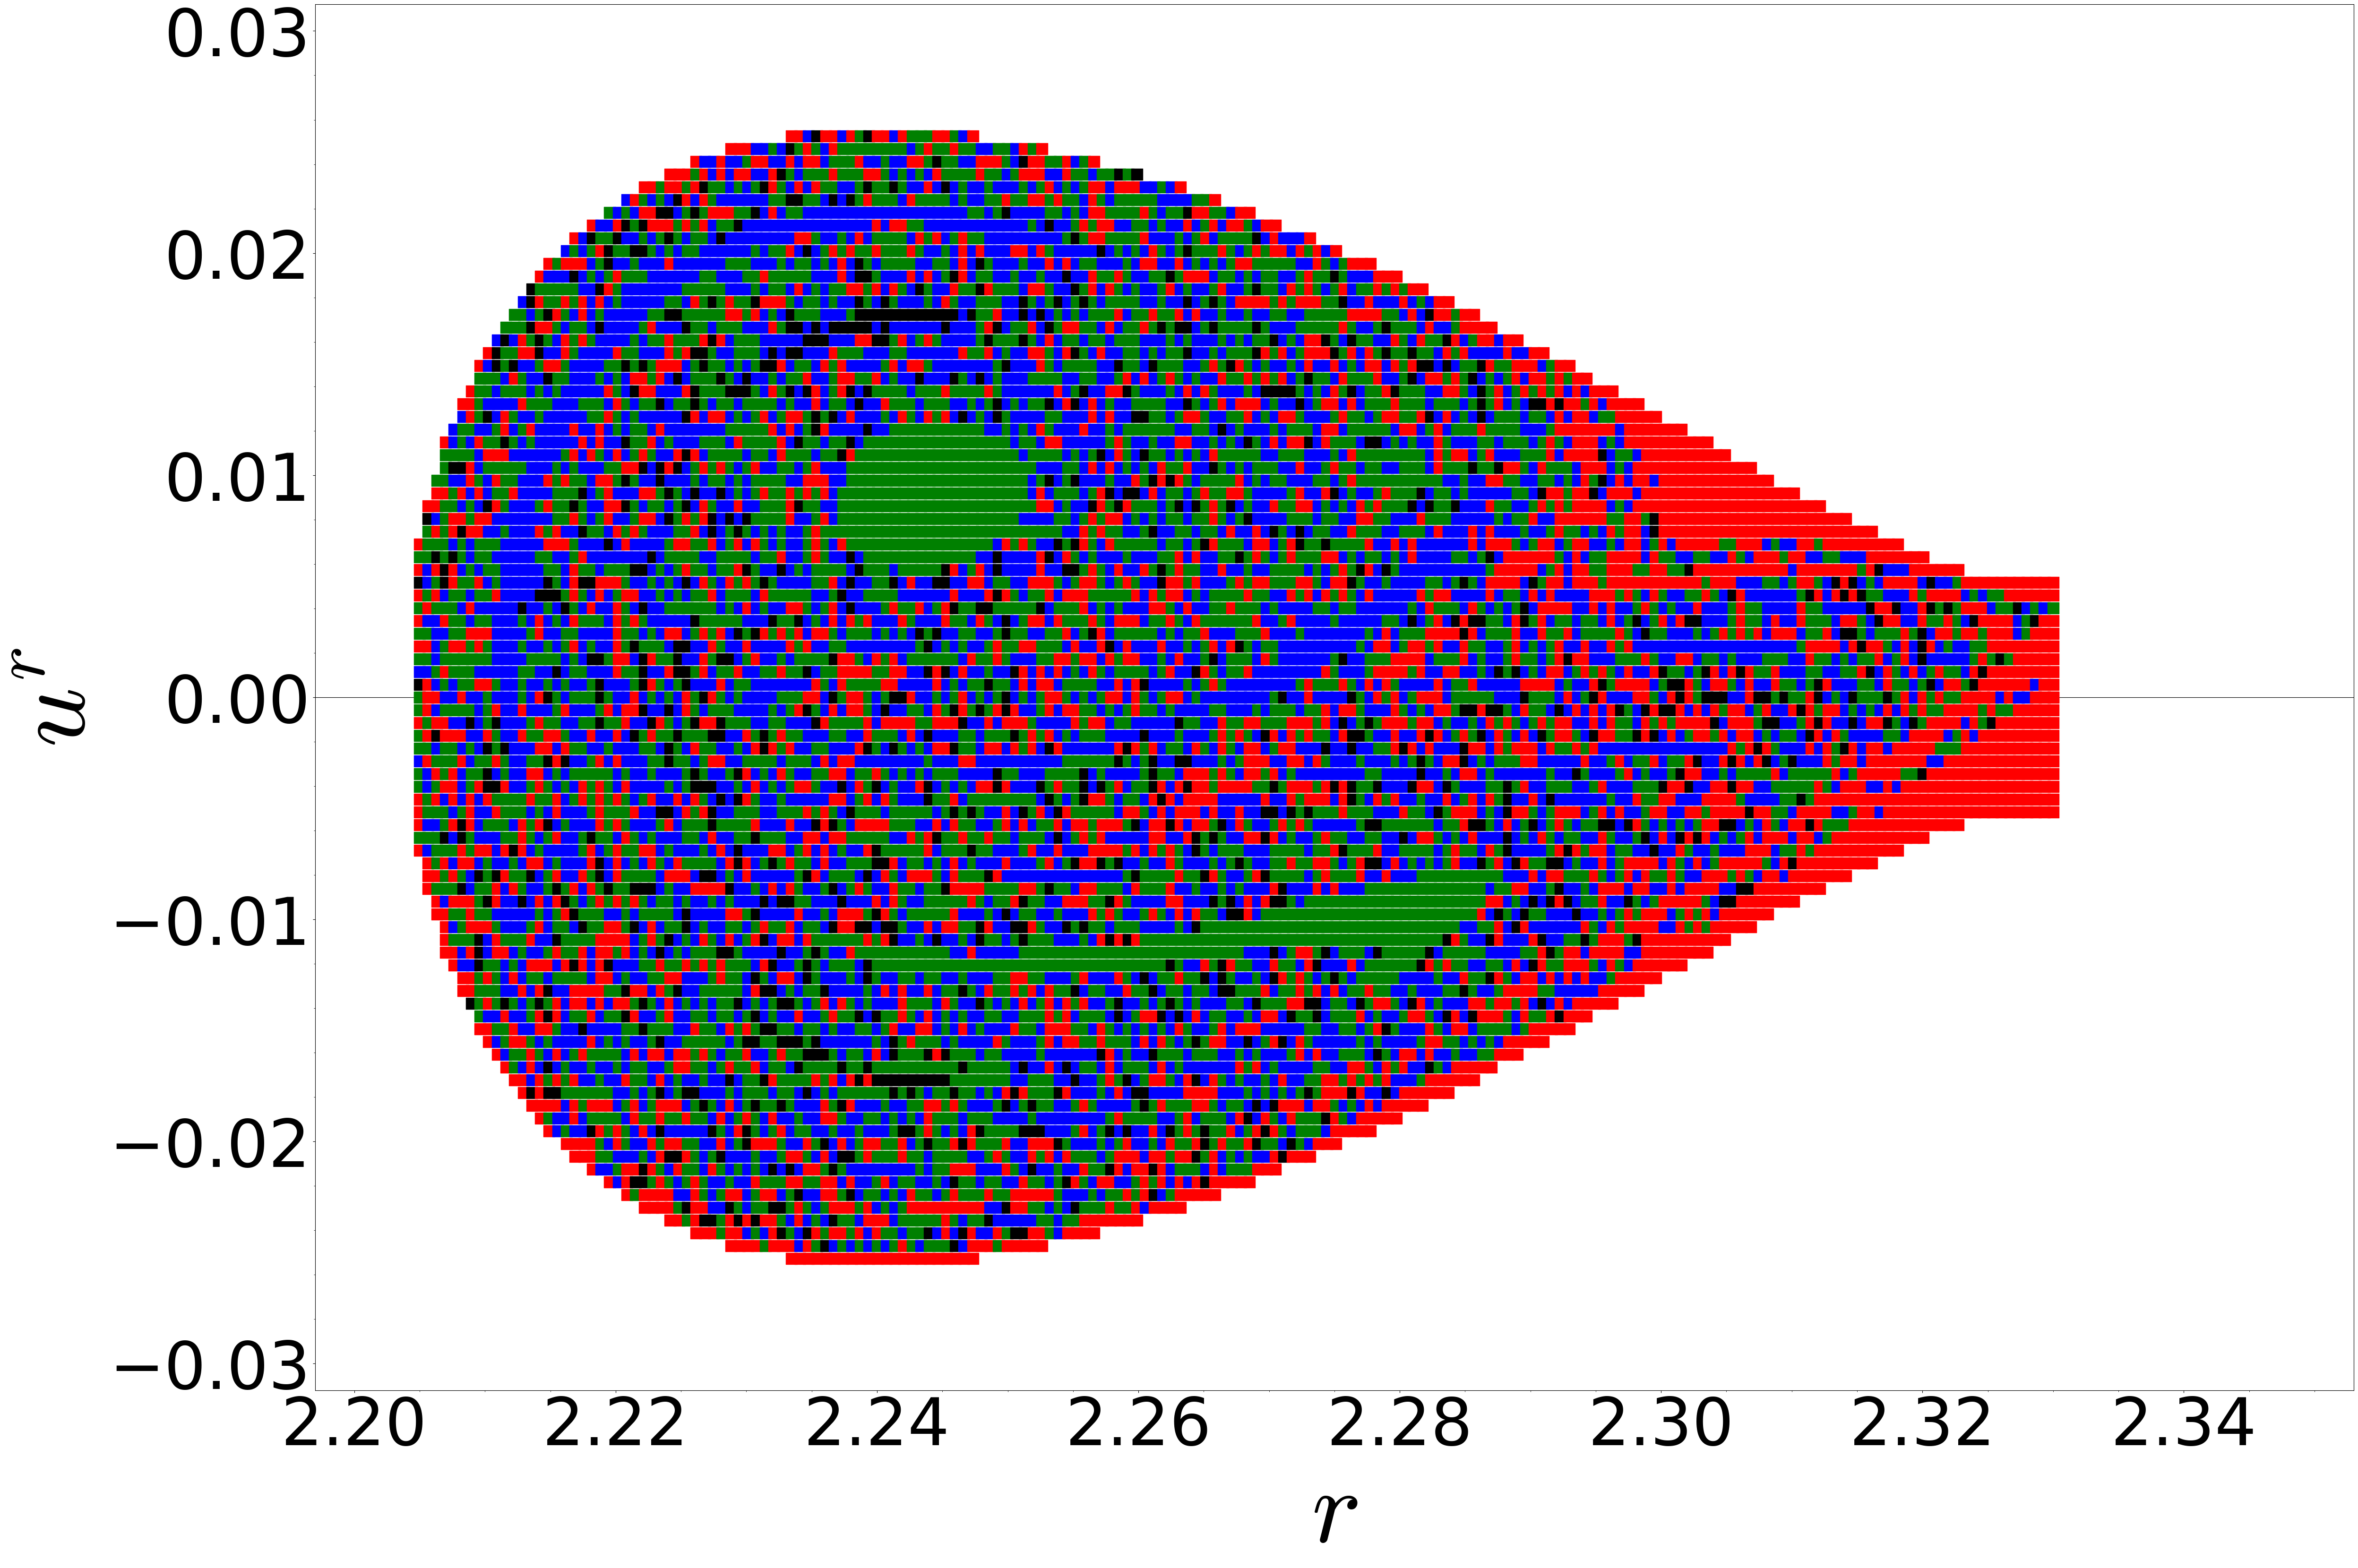

In [7]:
exb=[]
for i in range(len(r0_sel)):
    Α=[]
    Α=pd.read_csv(r'G:\desktop\exit basins1\poin(%f).csv'%r0_sel[i],delimiter=',',header=None,index_col=None)
    Α=Α.values.tolist()
    exb.append(Α)

points=[]
for i in range(len(exb)):
    for j in range(len(exb[i])):
        points.append([exb[i][j][1],exb[i][j][2]])

        
colors=[]
for i in range(len(exb)):
    for j in range(len(exb[i])):
        colors.append(exb[i][j][0])
        
graph_exitbasins=scatter_plot(points,aspect_ratio='automatic',figsize=[50,50],alpha=1,markersize=300,zorder=5,marker="s",edgecolor=colors,facecolor=colors,frame=True)
    
show(graph_exitbasins,xmin=2.2,xmax=2.35,ymin=-0.03,ymax=0.03,fontsize=100,figsize=50,axes_labels=[r'$r$', r'$u^r$'],frame=True) 

[2.205, -0.0057446808510638]

In [17]:
blackp=[]
for i in range(len(colors)):
    if colors[i]== 'black':
        blackp.append(points[i])
        

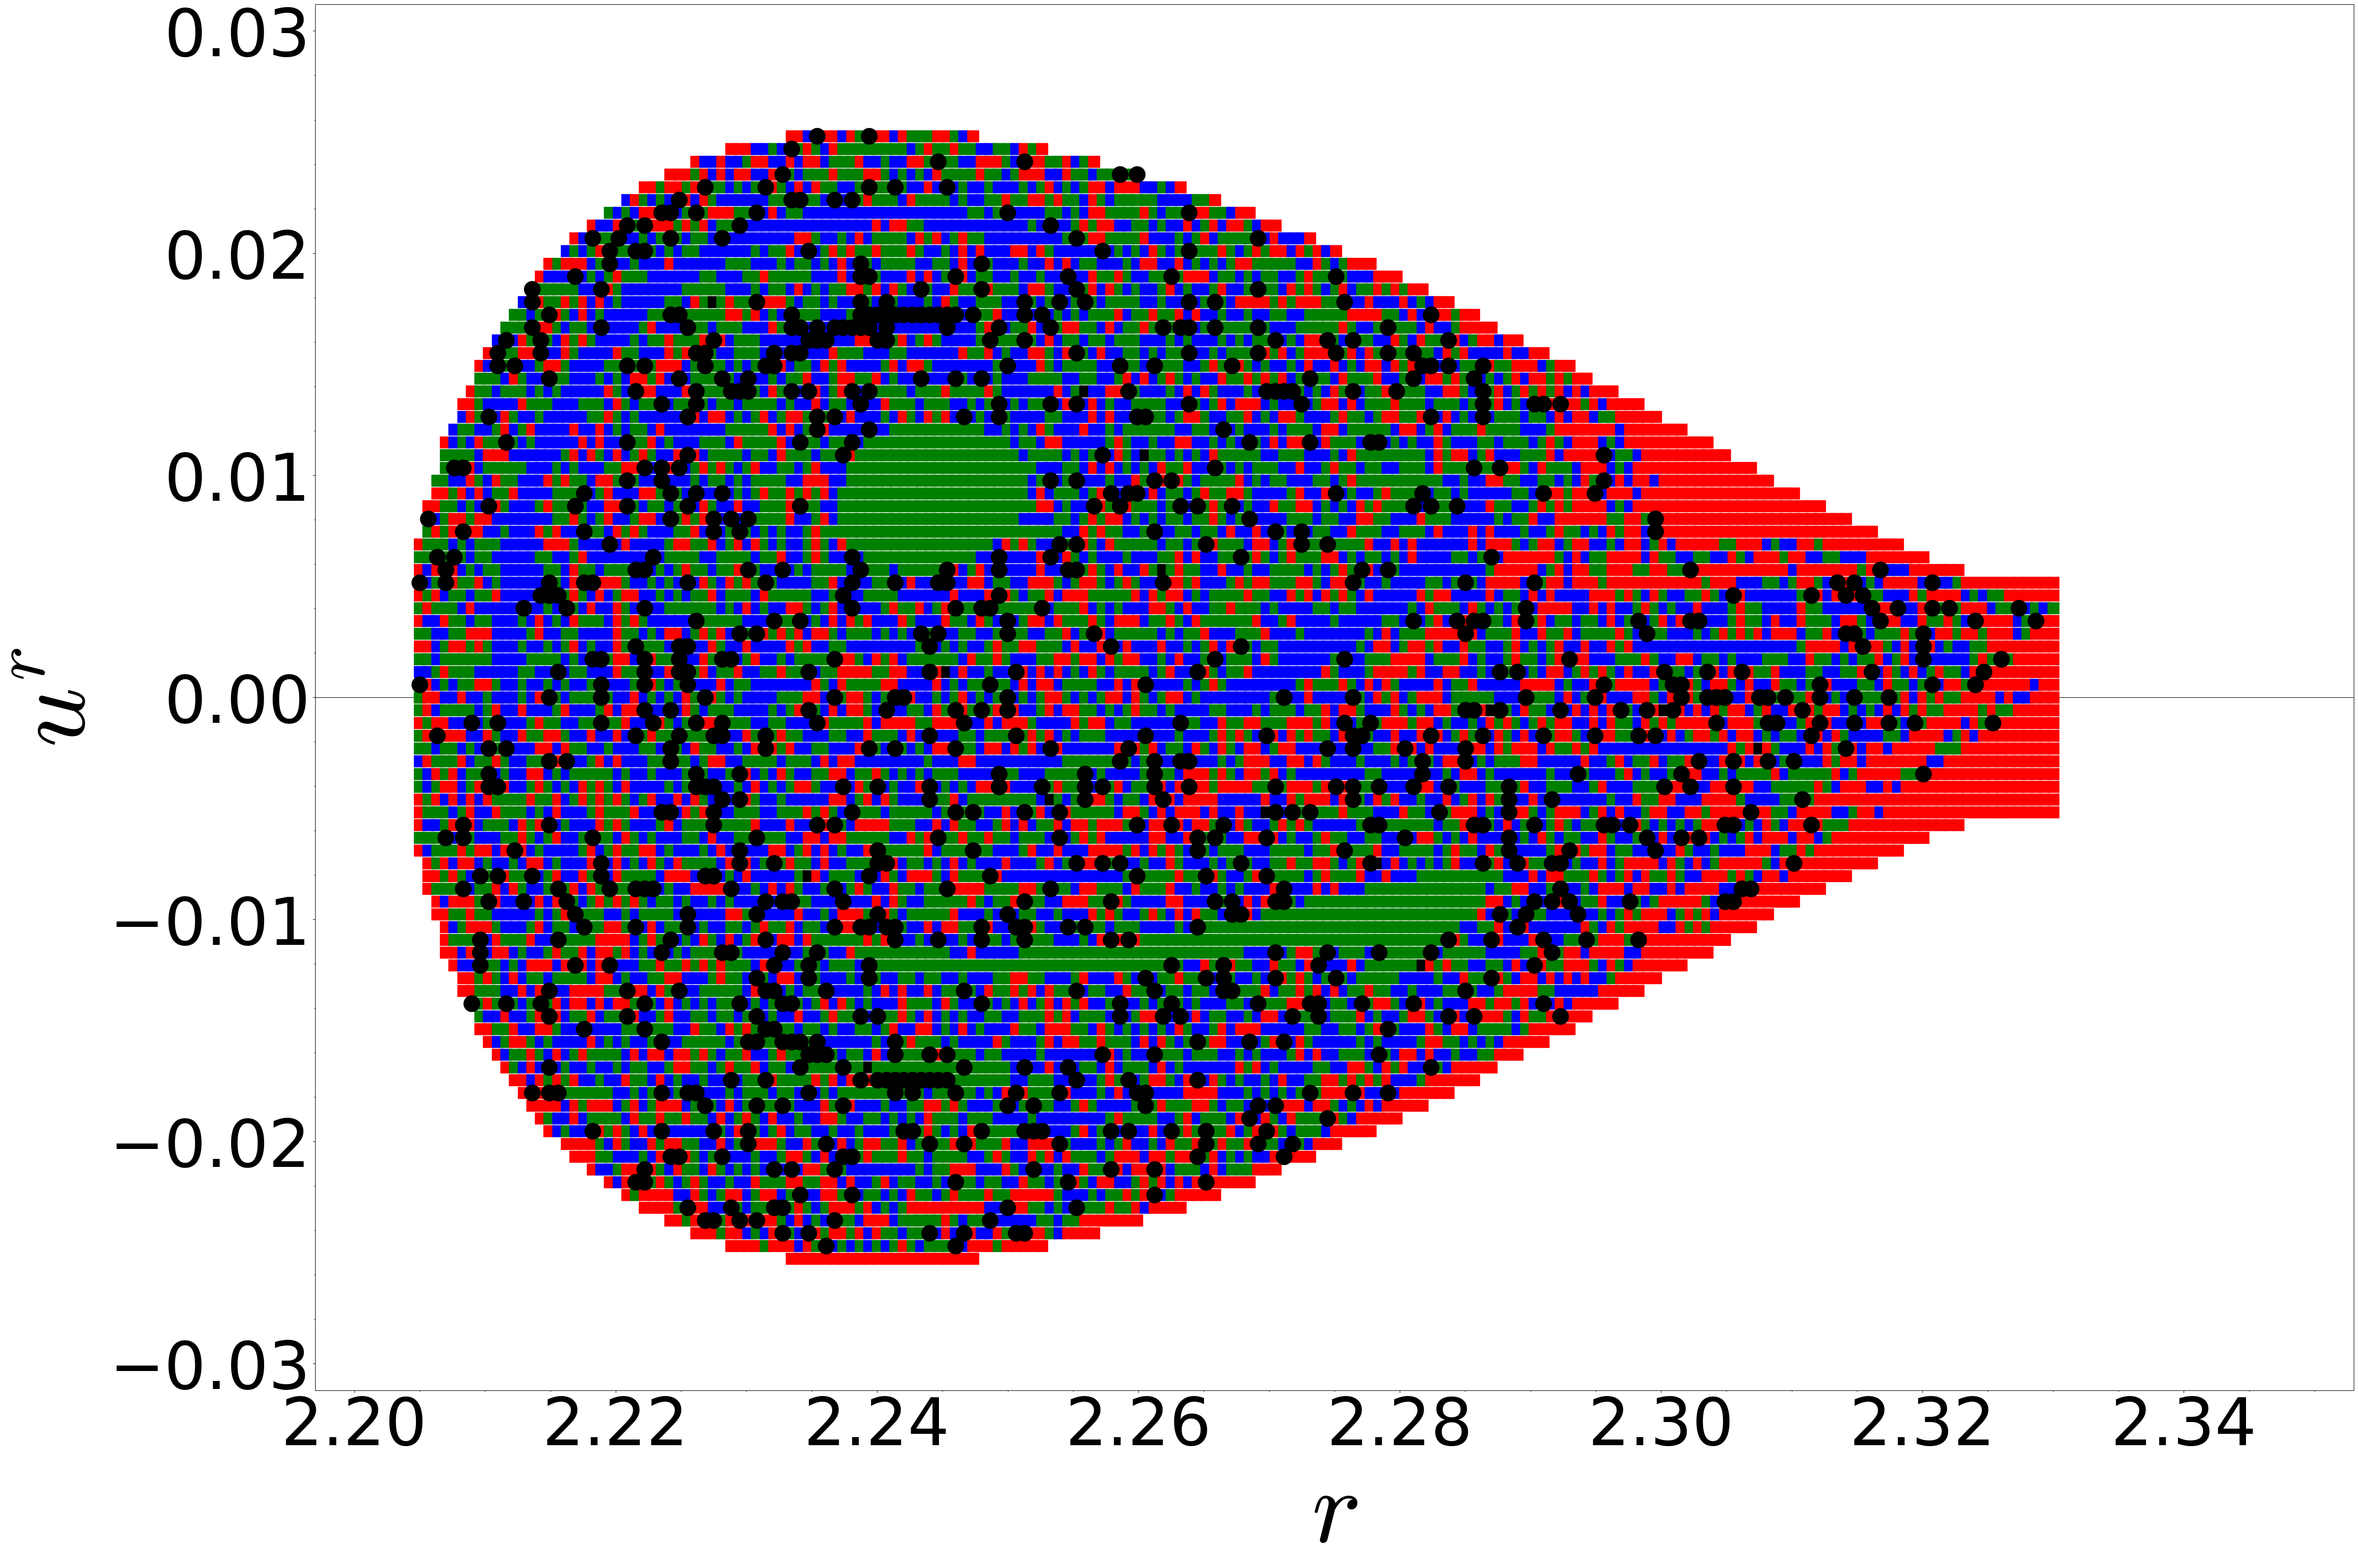

In [39]:
graph_exitbasins=scatter_plot(points,aspect_ratio='automatic',figsize=[50,50],alpha=1,markersize=300,zorder=5,marker="s",edgecolor=colors,facecolor=colors,frame=True)
graph_exitbasins2=scatter_plot(blackp,aspect_ratio='automatic',figsize=[50,50],alpha=1,markersize=600,zorder=5,marker="o",edgecolor='black',facecolor='black',frame=True)
graph_all=graph_exitbasins+graph_exitbasins2     
show(graph_all,xmin=2.2,xmax=2.35,ymin=-0.03,ymax=0.03,fontsize=100,figsize=50,axes_labels=[r'$r$', r'$u^r$'],frame=True) 

In [40]:
graph_all.save('exit_basin_blackalt.pdf')

<h2> Marginally Open HT System <h2>

For $b\approx 4.304332$, the allowed motion region is disconnected from the compact object leaving only one throat connected to infinity. The time periods the light rays spend in the pocket are long enough to get a good sense of their qualitative phenomenology.

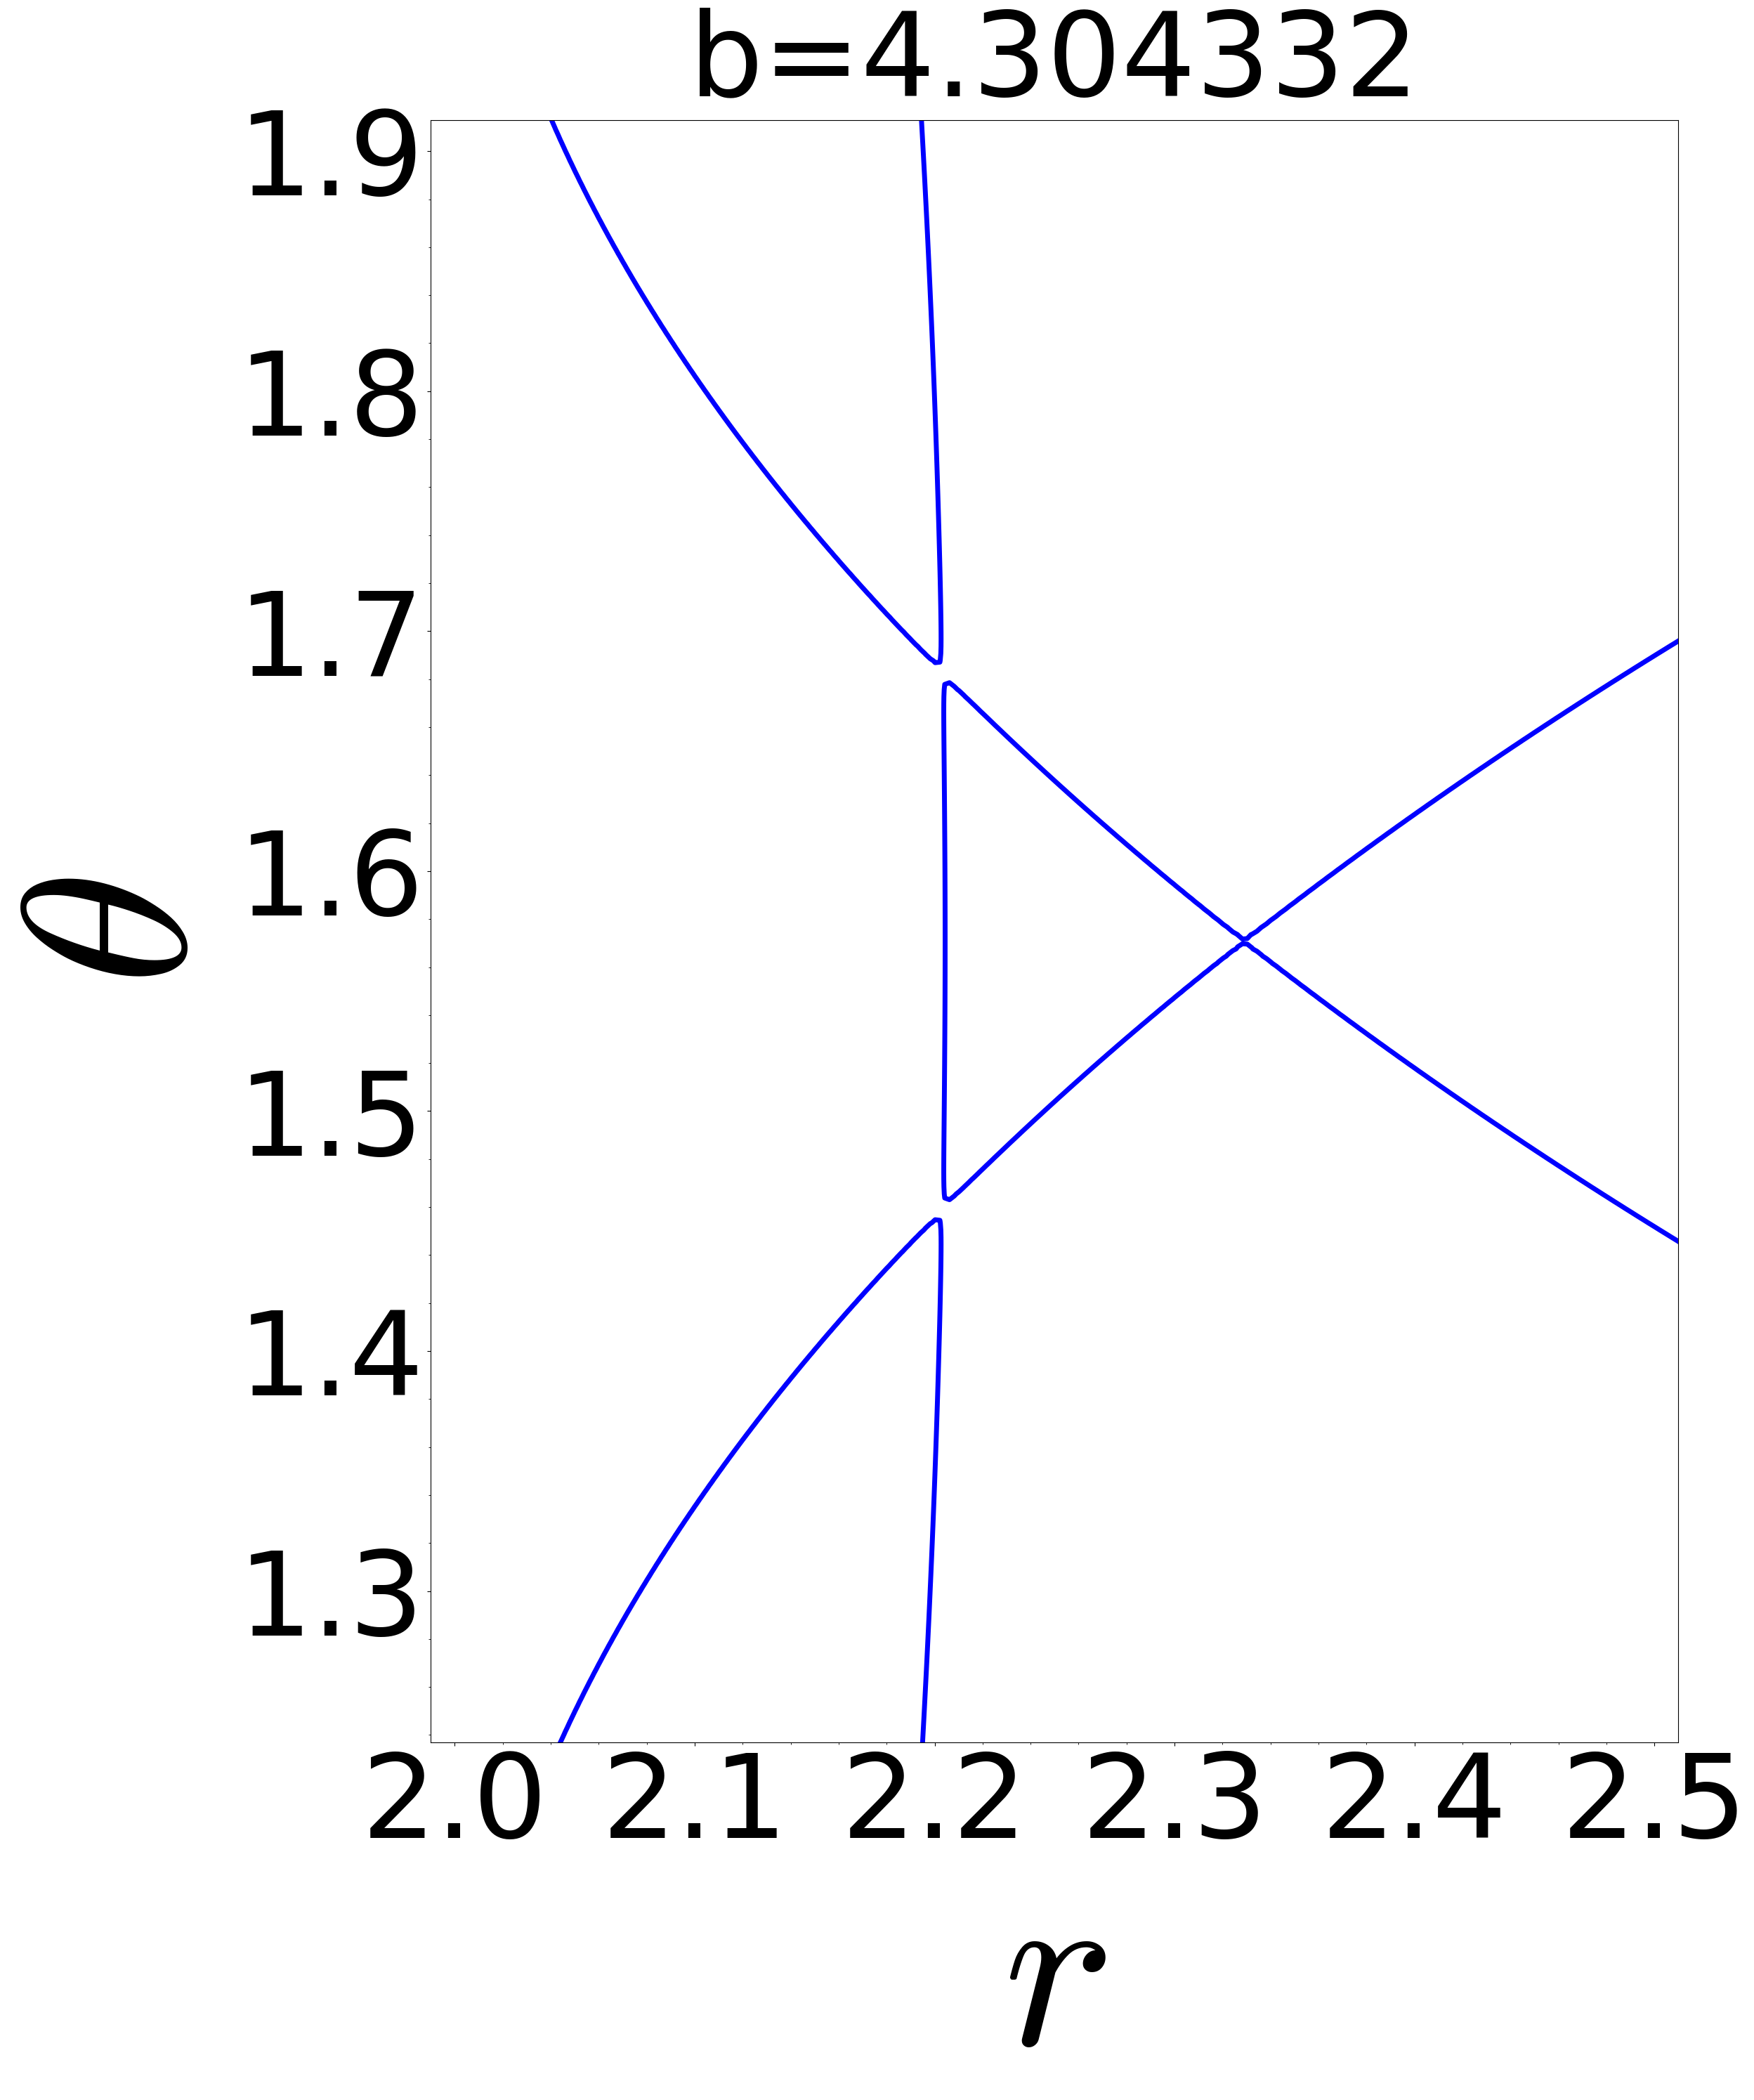

In [24]:
b=4.304332
sep(m,r,th,a)= -((1/D(m,r,th,a))*((b^2)*g00(m,r,th,a)+2*b*g03(m,r,th,a)+g33(m,r,th,a)))
czv(a,q)=sep(m,r,th,a)

graph_separatrix = implicit_plot(czv(0.327352,1),(r,2,4),(th,0,3),linewidth=5,
                       plot_points=1000,figsize=[30,30],fontsize=120,
                       axes_labels_size=2,
                       frame=True,title='b=%f'%b)
show(graph_separatrix,xmin=2,xmax=2.5,ymin=1.25,ymax=1.9,axes_labels=[r'$r$', r'$ \theta$'])

<h3> Poincare Sections <h3>

We draw a Poincare section for the marginally open HT system admitted for $b=4.304332$. The equatorial plane ($\theta=\frac{\pi}{2}$) is chosen as the section where the orbits with $u^\theta > 0 $ are recorded. The solution of the integrated curve is interpolated by the implemented **integrated_geodesic** function, but in order to also interpolate the velocity components, we use **SciPy's interp1d** function.

In [25]:
b=4.304332

In [26]:
r0_min = 2.2
r0_max = 2.3
nr0 = 3
dr0 = (r0_max - r0_min) / (nr0 - 1)
r0_sel = [(r0_min + i*dr0) for i in range(nr0)]


In [27]:
v00_min = -0.015
v00_max = 0.015
nv00 = 3
dv00 = (v00_max - v00_min) / (nv00 - 1)
v00_sel = [(v00_min + i*dv00) for i in range(nv00)]

v00_sel+= [0]

In [28]:
L=4.304332
check(r,v00)=((((1/D(m,r,pi/2,a))*((L^2)*g00(m,r,pi/2,a)+2*L*g03(m,r,pi/2,a)+g33(m,r,pi/2,a)))-((v00)^2)*g11(m,r,pi/2,a))/g22(m,r,pi/2,a)).subs(a=0.327352,q=1)

In [29]:


def integration_poinc(r0):

    
    

    
    poin=[]
    
    
    for v00 in v00_sel:
        
        if check(r0,v00)>0:
        
            print(r0)
        
            ph0=0
            v0 = initial_rv(r0,v00, b=-4.304332, ph0=ph0, inward=True)
            c1 = M.integrated_geodesic(g, (s, 0, 5000), v0, across_charts=True)


            sol1 = c1.solve_across_charts(step=0.1, method='odeint', parameters_values={a:0.327352,q:1},
                                            verbose='False',solution_key='sol1')


            
      
            interp = c1.interpolate(solution_key='sol1',
                                    interpolation_key='interp', verbose=True)

            c1._interpolations['interp'] = c1._interpolations['interp'][0][1]            
        
    
    
            
            for i in range(3,len(sol1[0][1]-5)):
        
    
                if cos(sol1[0][1][i][3])*cos(sol1[0][1][i-1][3]) < 0 :
                    v1=c1.tangent_vector_eval_at((((i-1)+i)/2)*0.1, verbose=False)
                    if v1[2]>0:
                    
                        
                        X1=[]
                        Y1=[]
                        X2=[]
                        Y2=[]
                        for j in range((i-3),(i+3)):
                            X1.append(sol1[0][1][j][3])
                            Y1.append(sol1[0][1][j][2])
                
                
                            v2=c1.tangent_vector_eval_at(j*0.1, verbose=False)
                            Y2.append(v2[1])
                
            
                        interpolate_x1 = numerical_approx(pi/2)
                        y_interp1 = interp1d(X1, Y1,kind='cubic')
                        y_interp2=interp1d(X1,Y2,kind='cubic')
                        l1=y_interp1(interpolate_x1)
                        l2=y_interp2(interpolate_x1)
                        poin.append([numerical_approx(l1),numerical_approx(l2)])
    
                    
        
    # a path of your choice can be used to save the results in .csv#
    # I use the impact parameter b in the title of the file. We note, however, that when saving multiple files
    # where the variable in the title exceeds 6 decimals, trouble may arise. We suggest dummy indeces ran inside the
    # loop, to avoid any confusion.
    my_df=pd.DataFrame(poin)
    my_df.to_csv(r'G:\desktop\poincaresect\poin(%f).csv' %b,index=False,header=False)
                  
       
            
            





pool = mp.Pool(10)
sols = pool.map(integration_poinc,[r0 for r0 in r0_sel])

2.25000000000000
2.30000000000000
Performing numerical integration with method 'ode'.
Integration will take place on the whole manifold domain.
Performing numerical integration with method 'ode'.
Integration will take place on the whole manifold domain.
Integration successful.
Performing cubic spline interpolation by default...
Integration successful.
Performing cubic spline interpolation by default...
Interpolation completed and associated with the key 'interp' (if this key already referred to a former interpolation, such an interpolation was erased).
Interpolation completed and associated with the key 'interp' (if this key already referred to a former interpolation, such an interpolation was erased).
2.25000000000000
Performing numerical integration with method 'ode'.
Integration will take place on the whole manifold domain.
Integration successful.
Performing cubic spline interpolation by default...
2.30000000000000
Interpolation completed and associated with the key 'interp' (if thi

In [30]:
pool.close() 

The Poincare section shown below came from a combination of $NxM$ grids ran in regions that after a general scan, hinted the existence of islands of stability.

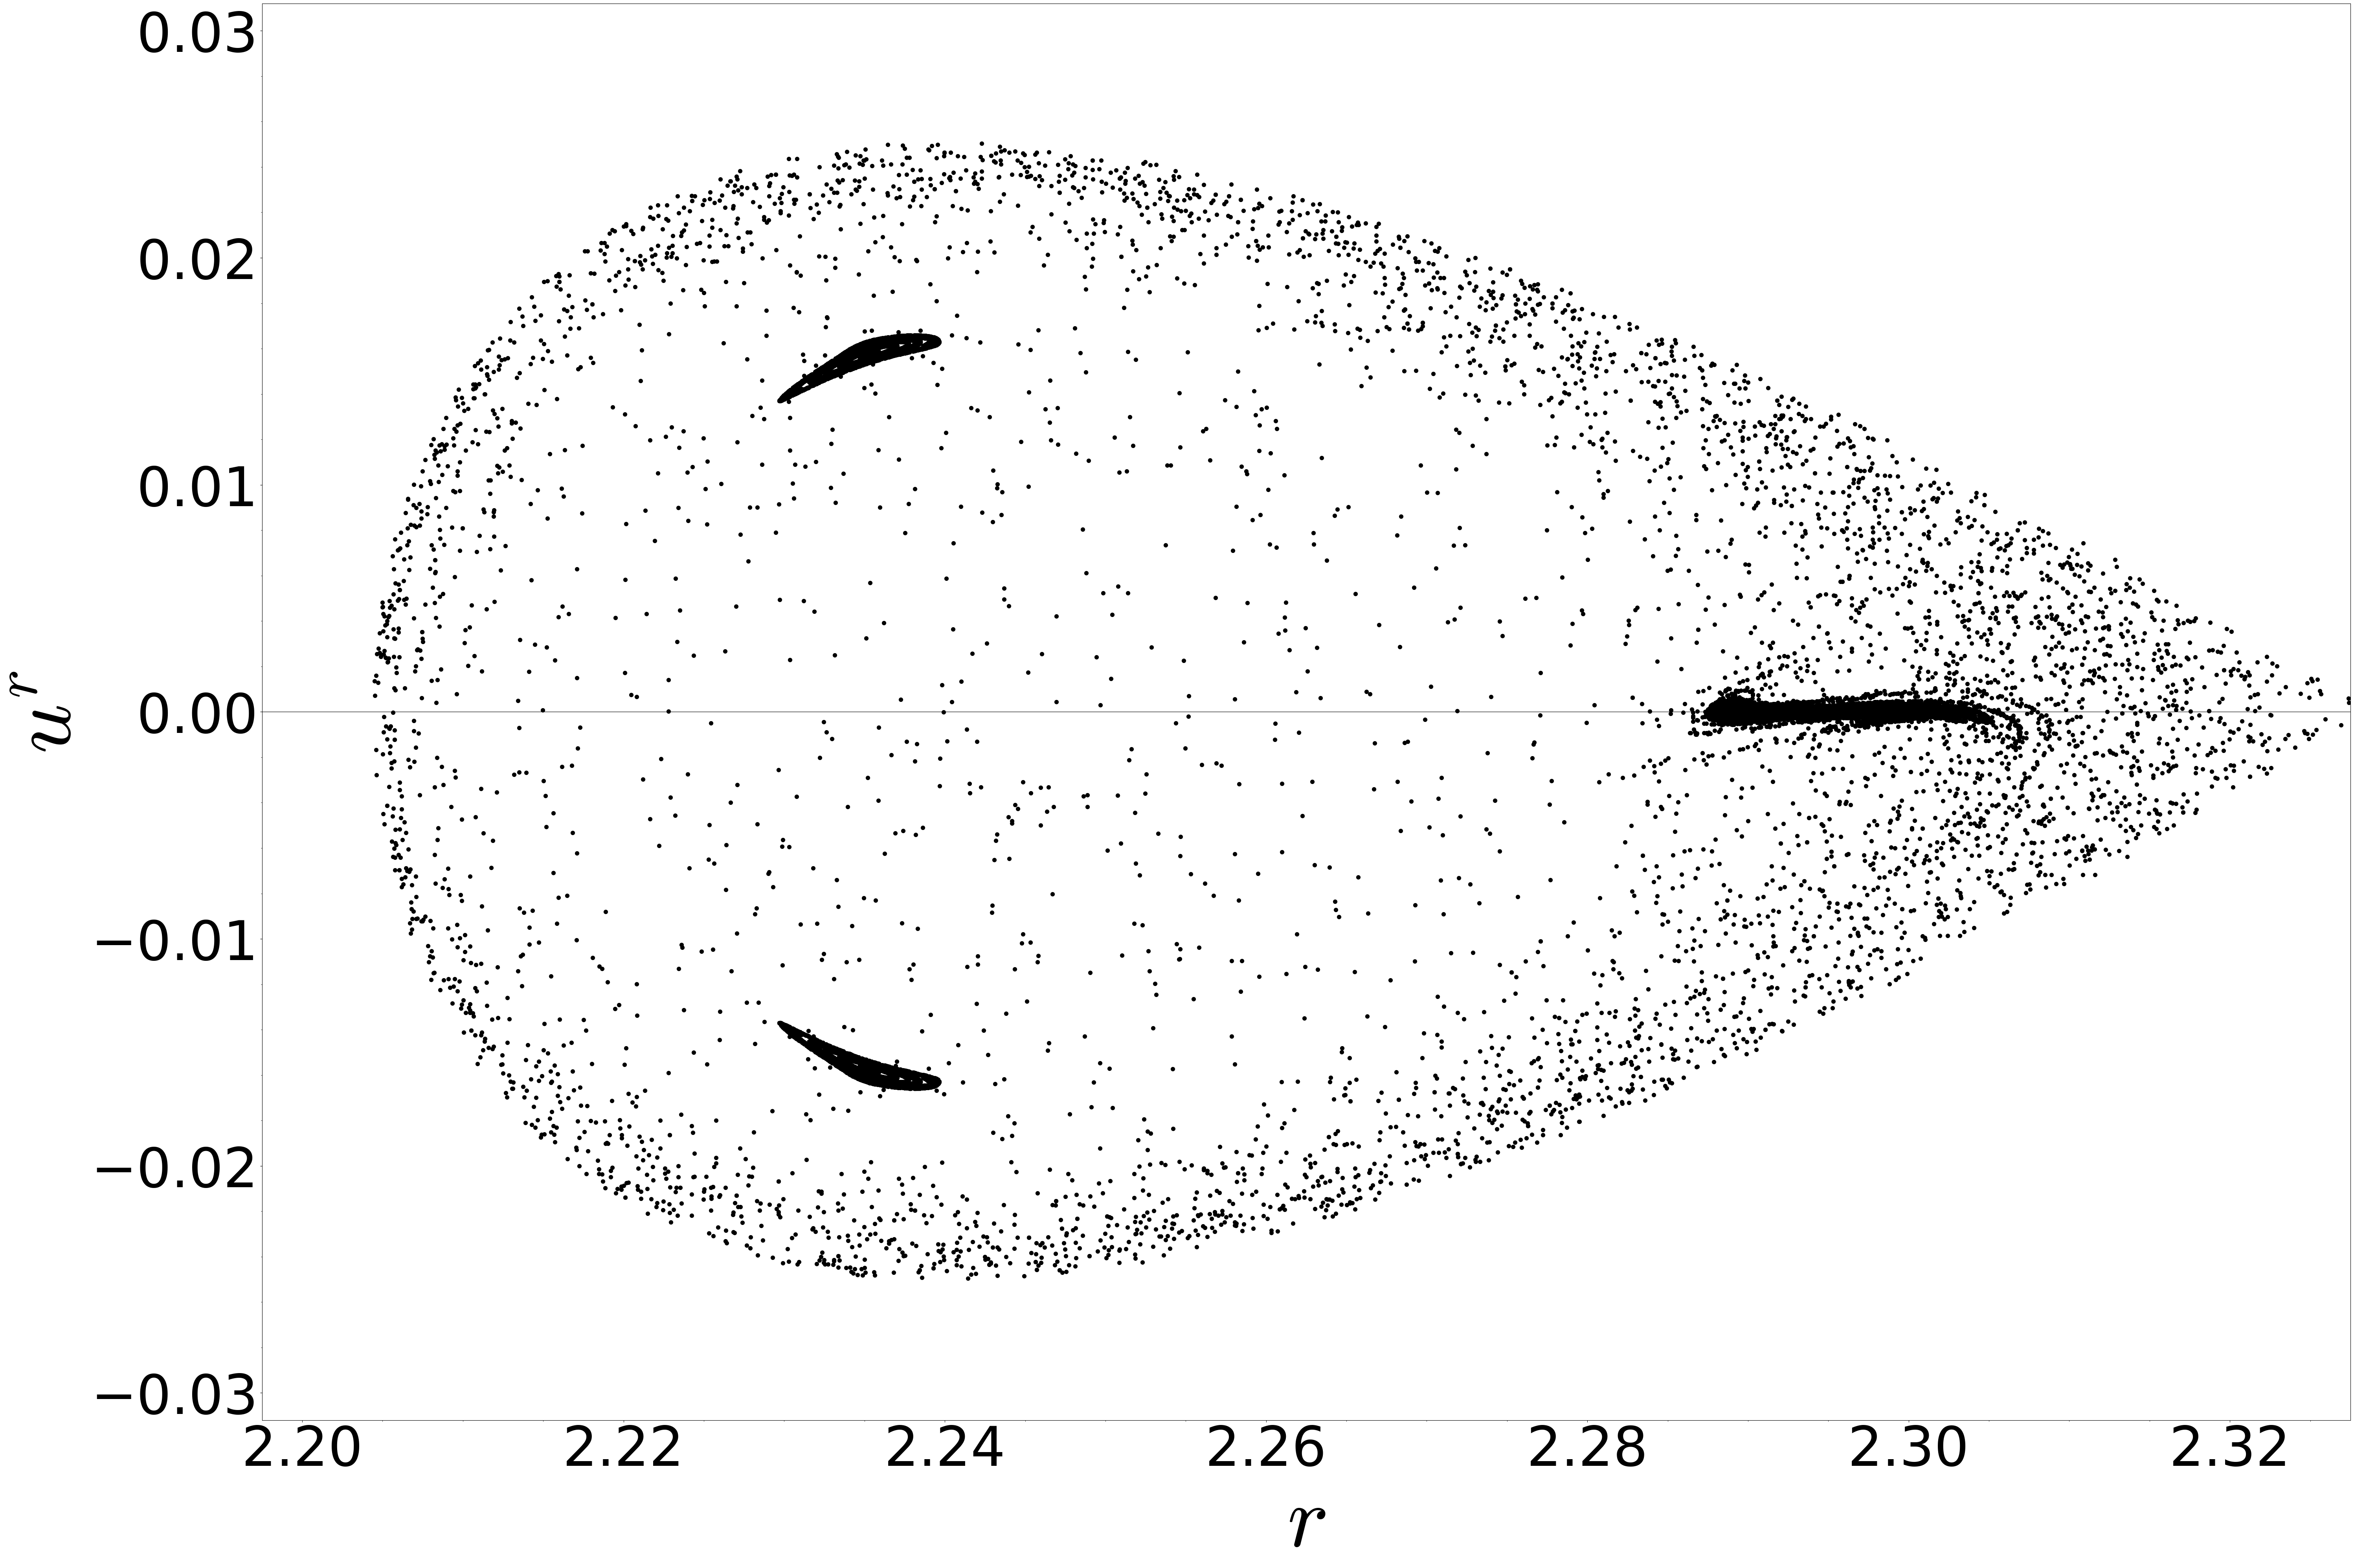

In [32]:

poincare=[]
poincare=pd.read_csv(r'G:\desktop\poincaresect\poin(%f).csv' %b,delimiter=',',header=None,index_col=None)
poincare=poincare.values.tolist()
graph_section=scatter_plot(poincare,aspect_ratio='automatic',figsize=[50,50],alpha=1,markersize=50,zorder=5,edgecolor='black',facecolor='black',frame=True)
show(graph_section,xmin=2.2,xmax=2.325,ymin=-0.03,ymax=0.03,fontsize=100,figsize=60,axes_labels=[r'$r$', r'$u^r$']) 
    